# Medical Appointment Attendance Prediction with KNN
<style>
div.code_cell {
    width: 100%;
}
</style>


Create `K-Nearest Neighbor Models` for the following Dataset:
- Download the following dataset (from Kaggle) with 110.527 medical appointments and 14 associated variables (characteristics). Use it to create models that can predict whether a patient will show up for the appointment booked or not.

- Here is the [link](https://www.kaggle.com/datasets/joniarroba/noshowappointments) to the dataset.


## Step 1: Import all necessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 2: Load the Dataset

- Read the `KaggleV2-May-2016.csv` file into pandas and assign it to the variable name `medicalAppointmentNoShows`
- Use the `DataFrame.info()` and `DataFrame.head()` methods to print information about the `medicalAppointmentNoShows` dataframe as well as the first few rows

In [2]:
medicalAppointmentNoShows = pd.read_csv("KaggleV2-May-2016.csv")
medicalAppointmentNoShows.info()
medicalAppointmentNoShows.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Step 2: Preprocess the Dataset

Drop the unnecessary columns.
Specify the list of unnecessary columns to drop

In [3]:
# Specify the list of unnecessary columns to drop
unnecessary_columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']

# Drop the unnecessary columns from the DataFrame
medicalAppointmentNoShows = medicalAppointmentNoShows.drop(unnecessary_columns, axis=1)

# Drop rows with missing values
medicalAppointmentNoShows = medicalAppointmentNoShows.dropna()


In [4]:
medicalAppointmentNoShows.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


###### Encode the categorical target variable
The categorical target variable `No-show` is encoded using the LabelEncoder from the `sklearn.preprocessing` module. This step ensures that the target variable is represented as numeric values `(0 and 1)` instead of string labels. 

In [5]:
label_encoder = LabelEncoder()
medicalAppointmentNoShows['No-show'] = label_encoder.fit_transform(medicalAppointmentNoShows['No-show'])
medicalAppointmentNoShows['Gender'] = label_encoder.fit_transform(medicalAppointmentNoShows['Gender'])

## Step 3: Split the Dataset
Split the dataset into features (X) and target variable (y)

Random Seed `(random_state)`:

- The random seed is used to ensure reproducibility. Setting a specific random seed will result in the same train-test split every time you run the code.
- If you want consistent results, you can set the random seed to a fixed value, such as 42.
- If you don't require consistent results and want a different train-test split each time you run the code, you can omit setting the random seed.

Test Size `(test_size)`:

- The test size determines the proportion of the dataset that will be allocated for testing. It is typically specified as a float value between 0 and 1, representing the percentage of the dataset to be used for testing.
- The choice of test size depends on the size of your dataset and the desired balance between the training and testing sets.
- A common practice is to use a test size of around 0.2 to 0.3, meaning 20% to 30% of the data will be used for testing. This leaves the majority of the data for training the model.
- If you have a large dataset, you can afford to allocate a smaller test size. Conversely, if you have a small dataset, you might want to allocate a larger test size to ensure a representative evaluation.
- It's important to strike a balance between having enough data for training and having enough data for testing to obtain reliable performance metrics.


In [6]:
X = medicalAppointmentNoShows.drop('No-show', axis=1)
y = medicalAppointmentNoShows['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 4: Train the K-Nearest Neighbors Classifier

Create an instance of the KNeighborsClassifier class:
- `n_neighbors` is a hyperparameter that determines the number of neighbors to consider for classification. You can choose an appropriate value for `k` based on your problem and dataset. Higher values of `k` smooth out the decision boundaries, while lower values make the model more sensitive to individual data points. Our `k` is `5`.

Train the KNN classifier using the `fit()` method:

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Step 5: Evaluate the K-Nearest Neighbors Classifier

In [8]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(y_pred[:10])

# Evaluate the model
accuracy = knn.score(X_test, y_test)

print()

# Print evaluation metrics
print("Final test set predictions:", y_pred)
print("Final test set accuracy:", accuracy)


Predictions:
[0 0 0 0 0 0 0 0 0 0]

Final test set predictions: [0 0 0 ... 0 0 0]
Final test set accuracy: 0.7686600922826382


## Step 6: Visualize the Dataset

This code creates a `bar chart` with two bars: one representing the accuracy of the model and the other representing the prediction for the first instance in the test set. The `accuracy` is shown in `blue`, and the `prediction` is shown in `green`. This simple visualization provides an overview of the model's performance and its prediction for a specific test instance.

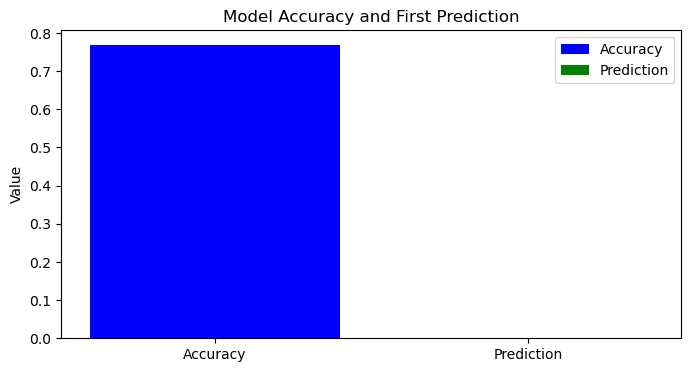

In [9]:
# Plot the accuracy and predictions
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(['Accuracy'], [accuracy], color='blue')
ax.bar(['Prediction'], [y_pred[0]], color='green')
ax.set_ylabel('Value')
ax.set_title('Model Accuracy and First Prediction')
ax.legend(['Accuracy', 'Prediction'])

plt.show()